In [1]:
%matplotlib inline
import geopandas as gpd


In [2]:
df = gpd.read_file("data/POA_2021_AUST_GDA2020.shp")

df = df.to_crs(epsg=7844)
df.crs


<Geographic 2D CRS: EPSG:7844>
Name: GDA2020
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Island, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.55, 173.34, -8.47)
Datum: Geocentric Datum of Australia 2020
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [3]:
df.head()

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83681 -12.45376, 130.83684 -12.4..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89875 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91831 -12.4..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85260 -12.43994, 130.85089 -12.4..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.56704..."


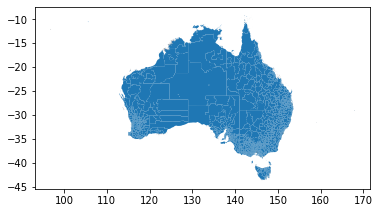

In [4]:
df.plot()

In [5]:
melb_suburbs = ['3000', '3001', '3002']



df2 = df[df["POA_NAME21"].isin(melb_suburbs)]
df2.head()

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
672,3000,3000,AUS,Australia,2.4814,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.083491,0.000254,"POLYGON ((144.96139 -37.82050, 144.96063 -37.8..."
673,3002,3002,AUS,Australia,1.8557,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.059488,0.000190,"POLYGON ((144.98978 -37.81906, 144.98973 -37.8..."


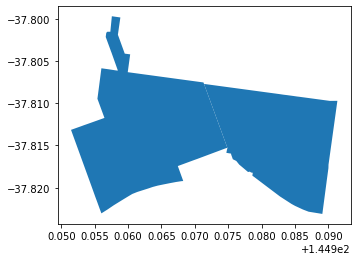

In [6]:
df2.plot()

In [7]:
import folium

#melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=13, tiles='CartoDB positron')

m

In [8]:
for _, r in df2.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['POA_NAME21']).add_to(geo_j)
    geo_j.add_to(m)

m

In [9]:
#Manchester Press Coffee

lat = '-37.813875'
lon = '144.9621361'

folium.Marker(location=[lat, lon], icon=folium.Icon(color='lightgray', icon='coffee', prefix='fa')).add_to(m)

m